In [1]:
data_path = 'TutorialData_Spheroid/Image/'

In [2]:
import os, glob
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2560*2160*10
import cv2

In [3]:
glob.glob(os.path.join(data_path, 'W0040*C2.tif'))

['TutorialData_Spheroid/Image/W0040F0001T0001Z016C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z014C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z009C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z010C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z012C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z015C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z013C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z008C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z011C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z004C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z006C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z002C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z007C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z005C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z001C2.tif',
 'TutorialData_Spheroid/Image/W0040F0001T0001Z003C2.tif']

In [4]:
import k3d

In [5]:
def make_data(file_list, color_min, color_max, color_map, binning=4, pixel_dim=[0.16, 0.16, 2.0]):
    # 画像データをbin4x4相当に縮小し、np.arrayで3Dデータにする
    file_list.sort()
    img = Image.open(file_list[0])
    buf = np.zeros((len(file_list), img.size[1]//binning, img.size[0]//binning), dtype=np.float32)
    for z, i in enumerate(file_list):
        img = Image.open(i)
        img = np.asarray(img, dtype=np.float32)
        img = cv2.resize(img, (buf.shape[2], buf.shape[1]), interpolation=cv2.INTER_AREA)
        buf[-z, :, :] = img.clip(color_min, color_max) - color_min
    
    # MIP生成
    return k3d.mip(buf, 
                   color_map, 
                   samples=512, gradient_step=0, color_range=[0, color_max - color_min], 
                   bounds=(0, buf.shape[2] * pixel_dim[0] * binning, 
                                   0, buf.shape[1] * pixel_dim[1] * binning, 
                                   0, buf.shape[0] * pixel_dim[2]))

In [6]:
ch1 = make_data(
    glob.glob(os.path.join(data_path, 'W0040*C1.tif')), 
    172, 1170, 
    [(0.0, 0.0, 0.5, 1.0), (1.0, 0.0, 0.5, 1.0)]
)

In [7]:
ch2 = make_data(
    glob.glob(os.path.join(data_path, 'W0040*C2.tif')), 
    97, 413, 
    [(0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 1.0, 0.0)]
)

In [8]:
plot = k3d.plot(background_color=0x00000000, grid_visible=False, lighting=0, height=500)
plot += ch2
plot += ch1
plot.display()

# https://k3d-jupyter.org/basic_functionality/Camera.html
plot.camera = [-160, 1320, 480, 320, 270, 0, 0, 0, 1]
plot.camera_fov = 15
plot.colorbar_object_id = 0

Output()

In [10]:
plot.camera = [663.5299215723267,
 -542.0652780581266,
 396.7653033803153,
 204.8000030517578,
 172.8000030517578,
 16,
 -0.16271532093004437,
 0.320508847410165,
 0.9331654746433947]

In [19]:
# 真上から表示
plot.camera = [320, 270, 1200, 320, 270, 0, 0, 1, 0]

In [18]:
# 斜め上から表示
plot.camera = [173, 1430, 255, 320, 270, 0, 0, 0, 1]

In [11]:
plot.fetch_screenshot()

In [13]:
len(plot.screenshot)

1236268

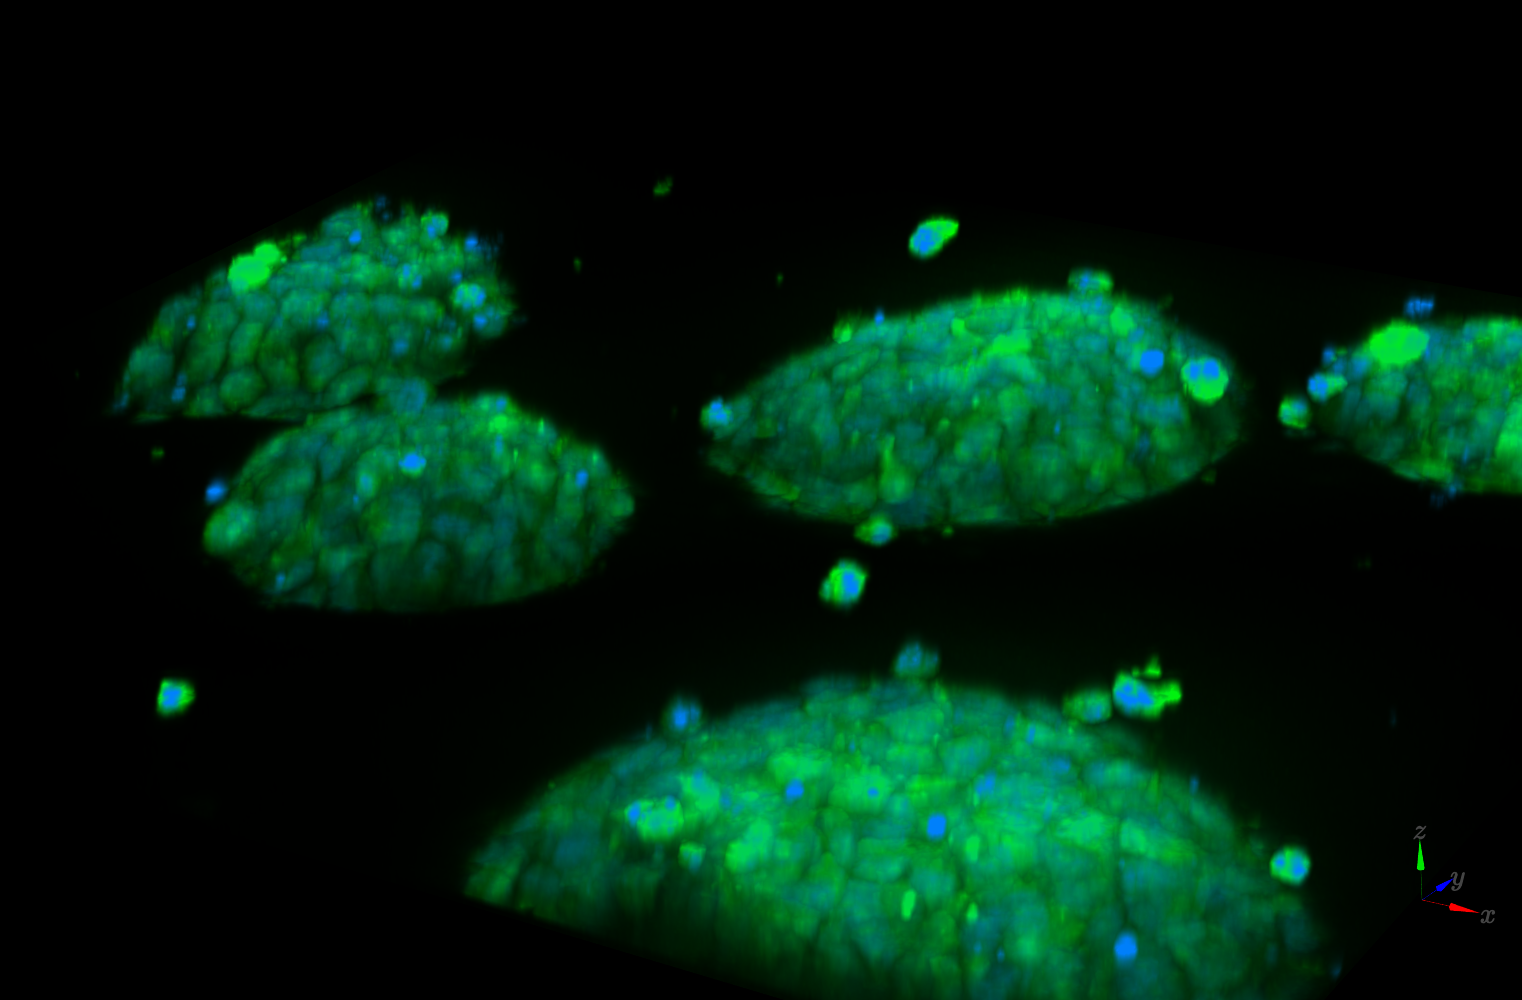

In [14]:
import base64, io
png_stream = base64.b64decode(plot.screenshot)
img = Image.open(io.BytesIO(png_stream))
img